In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as patches
# plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('../images/presentation.mplstyle')

In [2]:
def get_cmap(n=20):
    cmap = plt.get_cmap('hsv')
    colors = [cmap(i) for i in np.linspace(0, 1, n)]
    return colors

In [3]:
geo_stats = pd.read_csv("geographic-sum-per-day-ver_00127.csv")
geo_stats_2 = pd.read_csv("corona_city_table_ver_0074.csv")
geo_vacc_per_age = pd.read_csv("vaccinated_city_table_ver_0029.csv")


recover_data = pd.read_excel("corona_recovered_ver_00117.xlsx")
hospital_data = pd.read_csv("corona_hospitalization_ver_00227.csv")
dead_data = pd.read_csv("corona_deceased_ver_0093.csv")

age_gender_test_data = pd.read_csv("corona_age_and_gender_ver_0091.csv")
young_test_data = pd.read_excel("young_population_weekly_ver_0036.xlsx")

## organize vaccinations per age

In [4]:
geo_vacc_per_age = geo_vacc_per_age.replace(to_replace={'<15': 4})

In [5]:
geo_vacc_per_age['Date'] = pd.to_datetime(geo_vacc_per_age['Date'],format='%Y-%m-%d')
geo_vacc_per_age = geo_vacc_per_age.rename(columns={'Date':'date'})

In [6]:
geo_vacc_per_age.columns

Index(['CityName', 'CityCode', 'date', 'first_dose_0-19', 'first_dose_20-29',
       'first_dose_30-39', 'first_dose_40-49', 'first_dose_50-59',
       'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89',
       'first_dose_90+', 'second_dose_0-19', 'second_dose_20-29',
       'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
       'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89',
       'second_dose_90+'],
      dtype='object')

In [7]:
float_columns = ['first_dose_0-19', 'first_dose_20-29', 'first_dose_30-39', 'first_dose_40-49', 
                 'first_dose_50-59', 'first_dose_60-69', 'first_dose_70-79', 'first_dose_80-89', 'first_dose_90+', 
                 'second_dose_0-19', 'second_dose_20-29', 'second_dose_30-39', 'second_dose_40-49', 'second_dose_50-59',
                 'second_dose_60-69', 'second_dose_70-79', 'second_dose_80-89', 'second_dose_90+']
geo_vacc_per_age[float_columns] = geo_vacc_per_age[float_columns].astype(float)

In [8]:
agg_dict = {k:'sum' for k in float_columns}
geo_vacc_per_age = geo_vacc_per_age.groupby('date', as_index=False).agg(agg_dict)

In [9]:
agg_dict_weeks = {k:'last' for k in float_columns}
agg_dict_weeks['date'] = 'last'
geo_vacc_per_age['weeks_from'] = np.round((geo_vacc_per_age['date'] - pd.to_datetime('2020-03-21',format='%Y-%m-%d')).dt.days / 7, 1).astype(int)
geo_vacc_per_age = geo_vacc_per_age.groupby('weeks_from', as_index=False).agg(agg_dict_weeks)

In [10]:
agg_dict_weeks

{'first_dose_0-19': 'last',
 'first_dose_20-29': 'last',
 'first_dose_30-39': 'last',
 'first_dose_40-49': 'last',
 'first_dose_50-59': 'last',
 'first_dose_60-69': 'last',
 'first_dose_70-79': 'last',
 'first_dose_80-89': 'last',
 'first_dose_90+': 'last',
 'second_dose_0-19': 'last',
 'second_dose_20-29': 'last',
 'second_dose_30-39': 'last',
 'second_dose_40-49': 'last',
 'second_dose_50-59': 'last',
 'second_dose_60-69': 'last',
 'second_dose_70-79': 'last',
 'second_dose_80-89': 'last',
 'second_dose_90+': 'last',
 'date': 'last'}

In [11]:
geo_vacc_per_age[['weeks_from','date']][geo_vacc_per_age['date']>=pd.to_datetime('2020-07-01',format='%Y-%m-%d')]

,weeks_from,date
0,39,2020-12-25
1,40,2021-01-01
2,41,2021-01-08
3,42,2021-01-15
4,43,2021-01-22
5,44,2021-01-29
6,45,2021-02-05
7,46,2021-02-12
8,47,2021-02-19
9,48,2021-02-26


In [12]:
geo_vacc_per_age

,weeks_from,first_dose_0-19,first_dose_20-29,first_dose_30-39,first_dose_40-49,first_dose_50-59,first_dose_60-69,first_dose_70-79,first_dose_80-89,first_dose_90+,second_dose_0-19,second_dose_20-29,second_dose_30-39,second_dose_40-49,second_dose_50-59,second_dose_60-69,second_dose_70-79,second_dose_80-89,second_dose_90+,date
0,39,609.0,6564.0,14009.0,19061.0,20828.0,70780.0,64157.0,21011.0,3624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-25
1,40,4997.0,40950.0,60372.0,85776.0,111358.0,271011.0,237459.0,97977.0,22643.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-01
2,41,13170.0,89796.0,119085.0,182211.0,249627.0,429458.0,352795.0,156972.0,36664.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-01-08
3,42,16291.0,110415.0,149368.0,229598.0,329246.0,460305.0,369777.0,165118.0,38293.0,542.0,5713.0,12578.0,17238.0,18845.0,62584.0,56270.0,18207.0,3155.0,2021-01-15
4,43,25049.0,170991.0,199831.0,351781.0,418493.0,483842.0,381500.0,170491.0,39376.0,4147.0,36220.0,54071.0,76782.0,98472.0,249763.0,221394.0,89950.0,20409.0,2021-01-22
5,44,90616.0,245667.0,276312.0,459585.0,467405.0,503400.0,391976.0,175510.0,40618.0,11879.0,83144.0,111084.0,170419.0,234062.0,410042.0,339799.0,149826.0,34380.0,2021-01-29
6,45,129827.0,334826.0,386296.0,532812.0,503559.0,518926.0,400585.0,179887.0,41738.0,15636.0,105714.0,143699.0,222277.0,318175.0,451224.0,363960.0,161587.0,36839.0,2021-02-05
7,46,154469.0,451418.0,490955.0,581694.0,532801.0,532963.0,407578.0,183209.0,42596.0,23175.0,159499.0,192155.0,338873.0,407213.0,474693.0,375829.0,166987.0,37901.0,2021-02-12
8,47,189659.0,578358.0,595234.0,643813.0,570327.0,551309.0,415592.0,186554.0,43333.0,83785.0,231231.0,264651.0,445121.0,455987.0,494014.0,386107.0,171760.0,39030.0,2021-02-19
9,48,227053.0,693915.0,690380.0,701455.0,605650.0,570241.0,425016.0,190800.0,44220.0,123566.0,316741.0,370795.0,518791.0,492316.0,509781.0,394918.0,176197.0,40142.0,2021-02-26


## edit vaccinations data

In [13]:
geo_for_vacc = geo_stats[['date','accumulated_cases', 'accumulated_recoveries','accumulated_hospitalized',
                              'accumulated_deaths', 'accumulated_diagnostic_tests', 
                               'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']]

In [14]:
geo_for_vacc = geo_for_vacc.replace(to_replace={'<15': 4})

In [15]:
geo_for_vacc['date'] = pd.to_datetime(geo_for_vacc['date'],format='%Y-%m-%d')
geo_for_vacc = geo_for_vacc[geo_for_vacc['date'] >= pd.to_datetime('2020-03-21',format='%Y-%m-%d')]

In [16]:
geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']] = geo_for_vacc[['accumulated_cases', 'accumulated_recoveries', 'accumulated_hospitalized',
              'accumulated_deaths', 'accumulated_diagnostic_tests', 
              'accumulated_vaccination_first_dose', 'accumulated_vaccination_second_dose']].astype(float)

In [17]:
vaccinations_data = geo_for_vacc.groupby('date', as_index=False).agg(
    {'accumulated_cases':'sum',
     'accumulated_recoveries':'sum',
     'accumulated_hospitalized':'sum',
     'accumulated_diagnostic_tests':'sum',
    'accumulated_deaths':'sum',
     'accumulated_vaccination_first_dose':'sum',
     'accumulated_vaccination_second_dose':'sum'
    })

In [18]:
vaccinations_data['weeks_from'] = np.round((vaccinations_data['date'] - vaccinations_data['date'][0]).dt.days / 7, 1).astype(int)

In [19]:
# vaccinations_data[vaccinations_data['date'] == '2021-02-18']
# closed_schools = [(0, 6), (14, 23), (25, 31), (41, 45)]
# schools_opened = [()]

In [20]:
vaccinations_data = vaccinations_data.groupby('weeks_from', as_index=False).agg(
    {'accumulated_cases':'last',
     'accumulated_recoveries':'last',
     'accumulated_hospitalized':'last',
     'accumulated_diagnostic_tests':'last',
    'accumulated_deaths':'last',
     'accumulated_vaccination_first_dose':'last',
     'accumulated_vaccination_second_dose':'last',
     'date':'last'
    })

In [21]:
# change names in data from hebrew to english:
hospital_data_columns_english = ['date', 'num_hospitalizations', 'percentage_women_hospilizations', 'mean_age_hospilizations', 'variance_age_hospilizations', 
                                'num_ventilizations', 'percentage_women_ventilizations','mean_age_ventilizations', 'variance_age_ventilizations',
                                'easy_cases', 'percentage_women_easy_cases', 'mean_age_easy_cases', 'variance_age_easy_cases',
                                'medium_severity', 'percentage_women_medium_severity', 'mean_age_medium_severity', 'variance_age_medium_severity',
                                'severe_cases', 'percentage_women_severe_cases', 'mean_age_severe_cases', 'variance_age_severe_cases', 'cumulative_severe_cases']
column_names_to_english = {k:v for k,v in zip(hospital_data.columns, hospital_data_columns_english)}
hospital_data = hospital_data.rename(columns = column_names_to_english)

In [22]:
hospital_data['date'] = pd.to_datetime(hospital_data['date'],format='%Y-%m-%d')

In [23]:
# mean_age = hospital_data['mean_age_severe_cases']
# plt.plot(hospital_data['date'], mean_age, marker='*')
# plt.grid()

In [24]:
# change names of male, female and unknown to numbers
gender_name_replace = {'זכר' : 0, 
                       'נקבה': 1,
                       'לא ידוע' : -1}
age_gender_test_data['gender'] = age_gender_test_data['gender'].replace(to_replace = gender_name_replace)

In [25]:
# changing all values that say <15 to 7 which is the mean value
age_gender_test_data = age_gender_test_data.replace(to_replace={'<15': 1,
                                                               '80+': '80-100'})
young_test_data = young_test_data.replace(to_replace={'<15': 1})
age_gender_test_data = age_gender_test_data.dropna()

In [26]:
# split ages with - and make two columns
age_gender_test_data[['min_age', 'max_age']] =age_gender_test_data['age_group'].str.split('-',expand=True)
young_test_data[['min_age', 'max_age']] =young_test_data['age_group'].str.split('-',expand=True)

In [27]:
# change date format to datetime and add column of weeks from
age_gender_test_data['first_week_day'] = pd.to_datetime(age_gender_test_data['first_week_day'],format='%Y-%m-%d')
age_gender_test_data['last_week_day'] = pd.to_datetime(age_gender_test_data['last_week_day'],format='%Y-%m-%d')
young_test_data['first_week_day'] = pd.to_datetime(young_test_data['first_week_day'],format='%Y-%m-%d')
young_test_data['last_week_day'] = pd.to_datetime(young_test_data['last_week_day'],format='%Y-%m-%d')

In [28]:
# change dtype of float columns from object to float
age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']] = age_gender_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']].astype(float)
young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']] = young_test_data[['min_age', 'max_age', 'weekly_tests_num', 'weekly_cases', 'weekly_newly_tested']].astype(float)

In [29]:
# make a column which is the weeks from the beginning of the pandemic
age_gender_test_data['weeks_from'] = np.round((age_gender_test_data['last_week_day'] - age_gender_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)
young_test_data['weeks_from'] = np.round((young_test_data['last_week_day'] - young_test_data['last_week_day'][0]).dt.days / 7, 1).astype(int)

In [30]:
# keep only relevant columns
columns_age_gender = ['weeks_from', 'min_age', 'max_age', 'gender', 'weekly_tests_num', 'weekly_cases', 'weekly_deceased']
age_gender_test_data = age_gender_test_data[columns_age_gender]

In [31]:
# remove gender information
age_gender_test_data = age_gender_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'gender':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_deceased':'sum'})
young_test_data = young_test_data.groupby(['weeks_from', 'min_age'], as_index=False).agg({'weeks_from': 'first',
                                                            'min_age': 'first', 
                                                            'max_age': 'first',
                                                           'region':'sum',
                                                           'weekly_tests_num': 'sum',
                                                           'weekly_cases':'sum',
                                                           'weekly_newly_tested': 'sum'})
young_test_data = young_test_data.drop(columns='region')

## get percentages of each age group

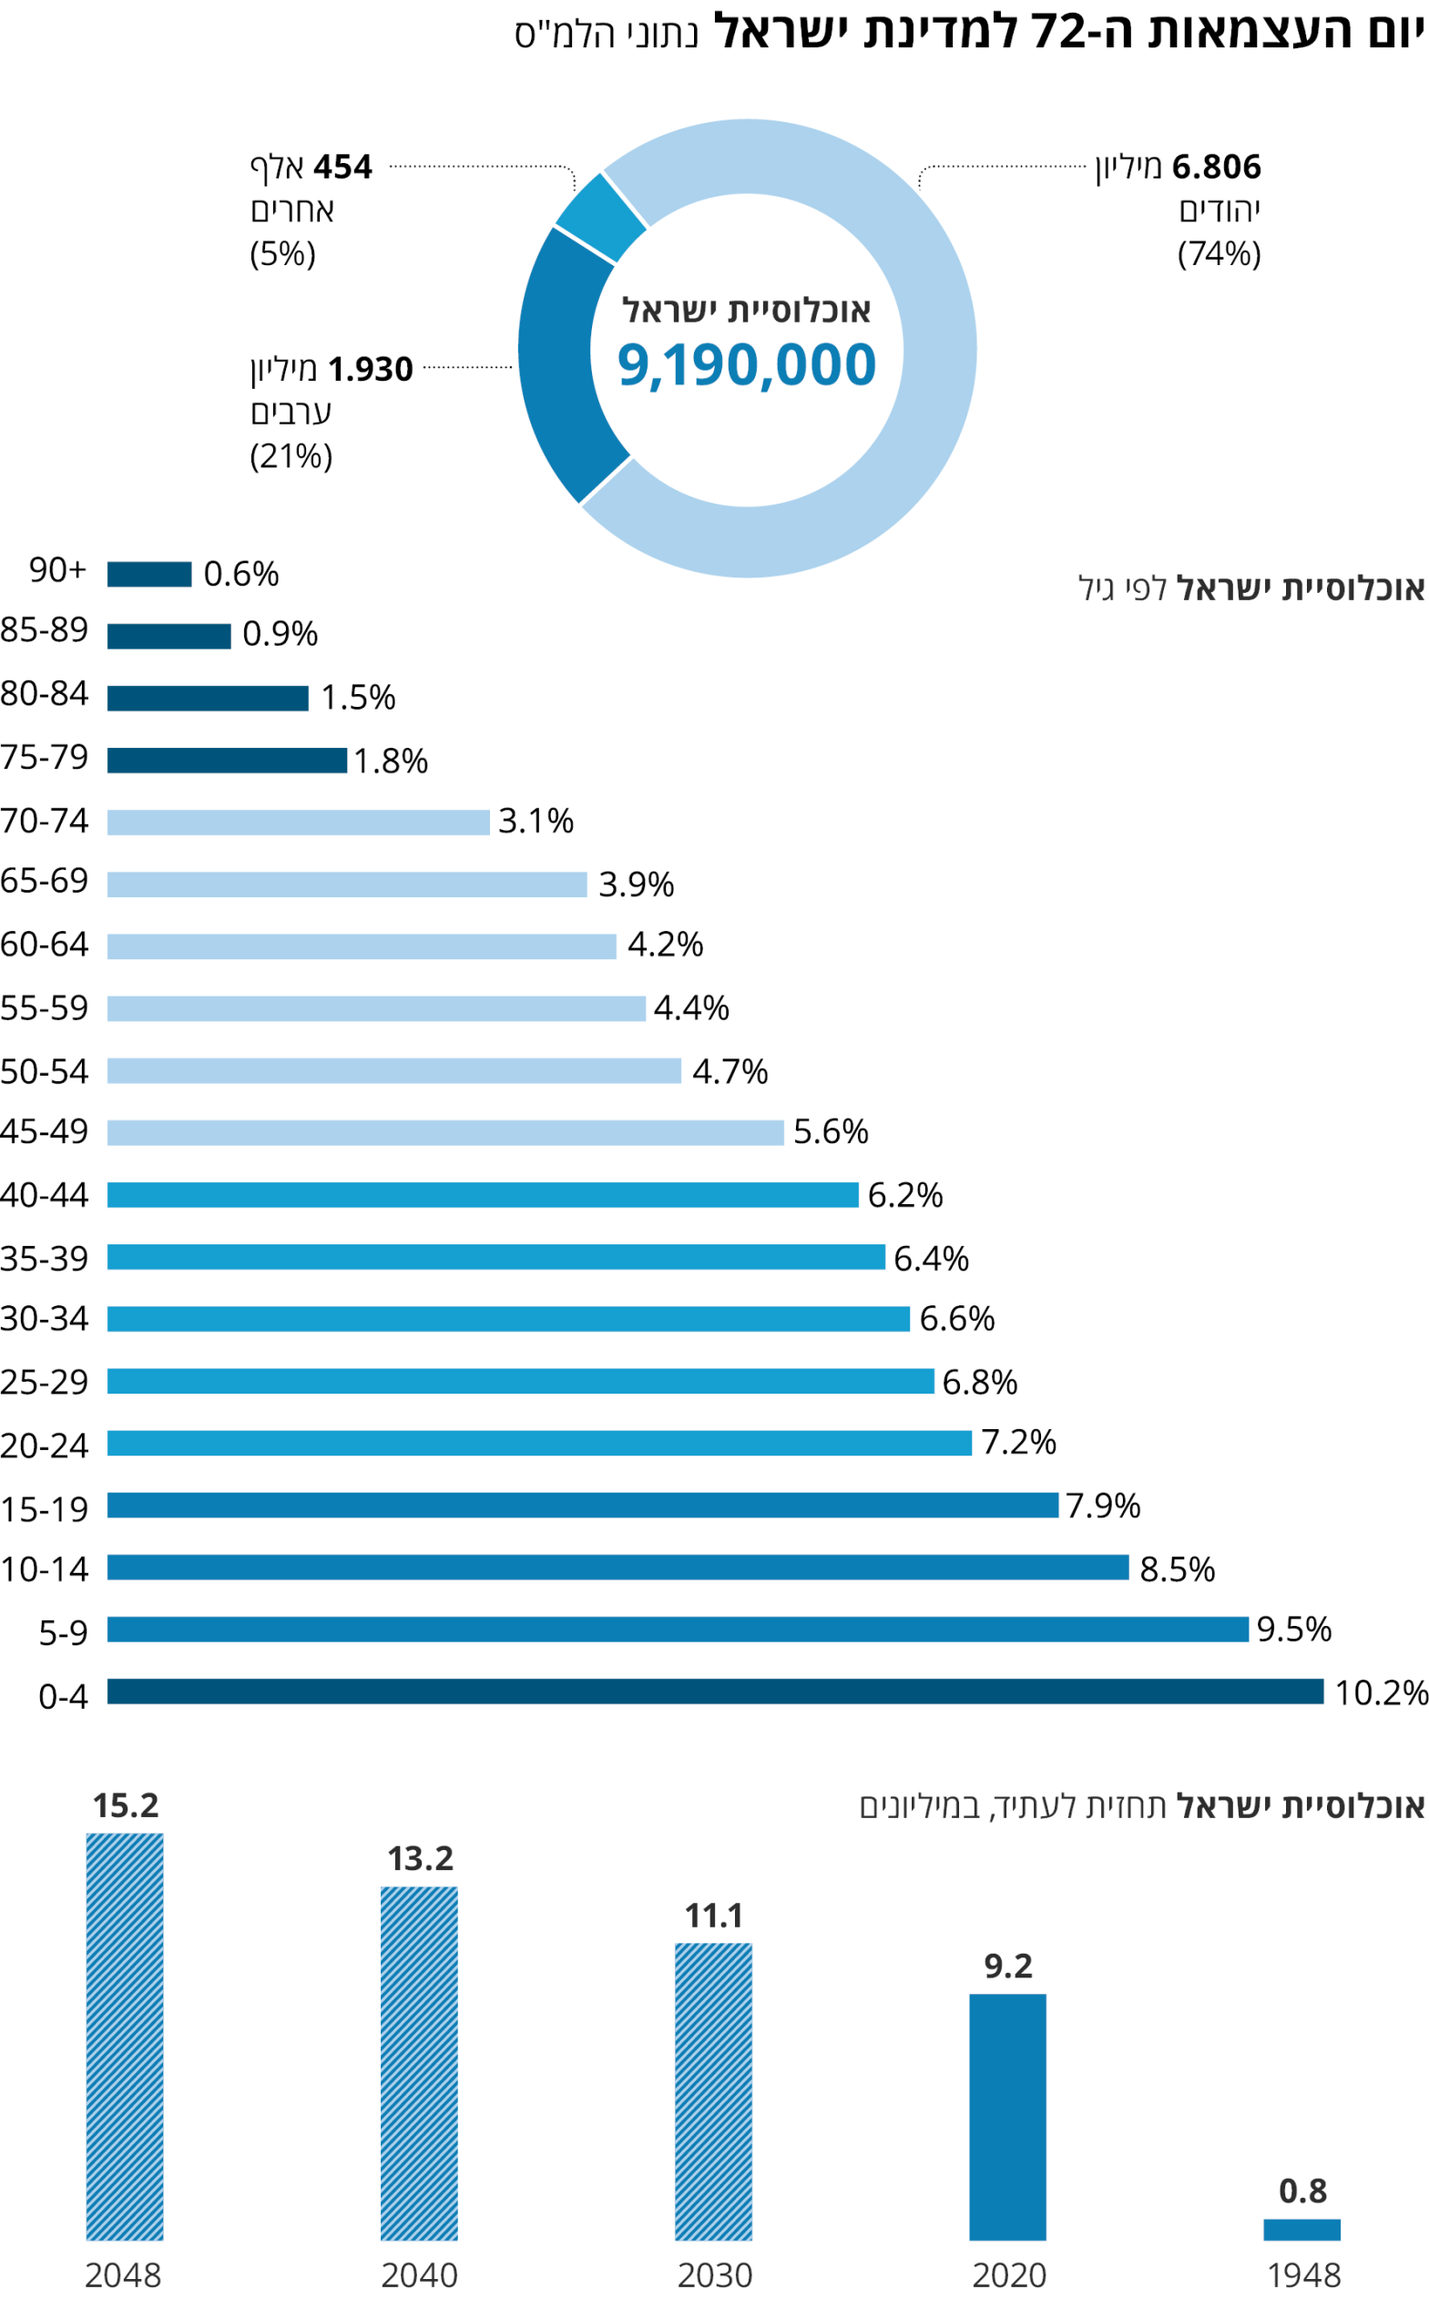

In [32]:
total_population = 9.2 * 10**6

In [33]:
# add data about amount in population - young table
percentage_in_population_young = {4: 10.2,
                           9: 9.5,
                           14:8.5,
                           19: 7.9}
percentage_in_population_young2 = {2: 7,
                           5: 6,
                           8:6,
                           11: 5,
                            14:5,
                            17:4,
                            20:4}
num_in_population_young = {k: v * total_population / 100 for (k, v) in percentage_in_population_young2.items()}
age_info_in_population_young = {'max_age': list(percentage_in_population_young2.keys()),
                         'percentage_age': list(percentage_in_population_young2.values()),
                         'total_age_in_population': list(num_in_population_young.values())}
age_info_in_population_young_df = pd.DataFrame.from_dict(age_info_in_population_young)

In [34]:
# add data about amount in population - older ages
percentage_in_population = {19: 36.1,
                           24:7.2,
                           29:6.8,
                           34: 6.6,
                           39:6.4,
                           44:6.2,
                           49:5.6,
                           54:4.7,
                           59:4.4,
                           64:4.2,
                           69:3.9,
                           74:3.1,
                           79:1.8,
                           100:3}
num_in_population = {k: v * total_population / 100 for (k, v) in percentage_in_population.items()}
age_info_in_population = {'max_age': list(percentage_in_population.keys()),
                         'percentage_age': list(percentage_in_population.values()),
                         'total_age_in_population': list(num_in_population.values())}
age_info_in_population_df = pd.DataFrame.from_dict(age_info_in_population)

In [35]:
# merge population data with covid data for both tables
age_gender_test_data = pd.merge(age_info_in_population_df, age_gender_test_data, how='right', on='max_age')
young_test_data = pd.merge(age_info_in_population_young_df, young_test_data, how='right', on='max_age')

In [36]:
# create aggregated table of total number of cases for each week
test_data_agg_weeks = age_gender_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_deceased':'sum',
                                                                                      'weekly_cases':'sum'})
test_data_young_agg_weeks = young_test_data.groupby('weeks_from', as_index=False).agg({'weekly_tests_num':'sum',
                                                                                      'weekly_newly_tested':'sum',
                                                                                       'weekly_cases':'sum'})

## draw results for older data 

In [37]:
def draw_per_total(table_per_age, total_table, with_dead = True, with_new = False, seperate_tables = False):
    colors = get_cmap(n=40)
    if not seperate_tables:
        if with_dead or with_new:
            fig, ax = plt.subplots(3, 1)
        else:
            fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(table_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_total_pos = np.array(total_table['weekly_cases'])
        n_total_tests = np.array(total_table['weekly_tests_num'])
        if seperate_tables:
            if (with_dead or with_new):
                fig, ax = plt.subplots(3, 1)
            else:
                fig, ax = plt.subplots(2, 1)
        if with_dead:
            n_total_dec = np.array(total_table['weekly_deceased'])
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_total_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of dead per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            n_total_new = np.array(test_data_young_agg_weeks['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_total_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('% of new tests per age')
            ax[2].set_xlabel('Weeks from start of Covid')
        percentage_in_population = df_a.percentage_age.unique().item()
        ax[0].plot(n_weeks, 100 * n_pos / n_total_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[0].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        ax[1].plot(n_weeks, 100 * n_tests / n_total_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
#         ax[1].plot(n_weeks, np.ones(shape=n_weeks.size) + percentage_in_population, color=colors[i])
        if seperate_tables:
            ax[0].legend()
            ax[1].legend()
            ax[0].grid()
            ax[1].grid()
            ax[0].set_title('% of positive cases per age')
            ax[1].set_title('% of tests per age')
            ax[0].set_ylabel('% of positive cases from total cases')
            if with_dead or with_new:
                ax[2].legend()
                ax[2].grid()
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('% of positive cases per age')
    ax[1].set_title('% of tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
    return fig, ax

In [38]:
def draw_per_population(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new / n_population, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/population per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/population per age ')
    ax[1].set_title('number of tests/population per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [39]:
def draw_vaccinations_percentage(vacc_data, fig, ax):
    percentage_first = (vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_first_dose']) * 100 / total_population
    percentage_second =(vacc_data['accumulated_recoveries'] + vacc_data['accumulated_vaccination_second_dose']) * 100 / total_population
    ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    ax2 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('% of population vaccinated', color=color)  # we already handled the x-label with ax1
    ax2.plot(vacc_data['weeks_from'] , percentage_second, marker='o', color=color)
    ax2.plot(vacc_data['weeks_from'] , percentage_first, marker='o', color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

In [40]:
def draw_per_max(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        max_pos = np.max(n_pos)
        max_tests = np.max(n_tests)
        ax[0].plot(n_weeks, 100 * n_pos / max_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests / max_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            max_dec = np.max(n_dec)
            ax[2].plot(n_weeks, 100 * n_dec / max_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            max_new = np.max(n_new)
            ax[2].plot(n_weeks, 100 * n_new / max_new, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead/max new per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases/max positive cases per age ')
    ax[1].set_title('number of tests/max tests per age')
    ax[0].set_ylabel('% of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [41]:
def draw_absolute_numbers(data_per_age, with_dead=True, with_new=False):
    colors = get_cmap(n=40)
    if with_dead or with_new:
        fig, ax = plt.subplots(3, 1)
    else:
        fig, ax = plt.subplots(2, 1)
    for i, (a, df_a) in enumerate(data_per_age.groupby(['min_age', 'max_age'])):
        n_tests = np.array(df_a['weekly_tests_num'])
        n_pos = np.array(df_a['weekly_cases'])
        n_weeks = np.array(df_a['weeks_from'])
        n_population = df_a['total_age_in_population'].mean()
        ax[0].plot(n_weeks, 100 * n_pos, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        ax[1].plot(n_weeks, 100 * n_tests, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_dead:
            n_dec = np.array(df_a['weekly_deceased'])
            ax[2].plot(n_weeks, 100 * n_dec, color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
        if with_new:
            n_new = np.array(df_a['weekly_newly_tested'])
            ax[2].plot(n_weeks, 100 * n_new , color = colors[i], label=f'ages:{int(a[0])}-{int(a[1])}', marker='*')
            ax[2].set_title('number dead per age')
    
    ax[0].legend()
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Positive cases per age ')
    ax[1].set_title('number of tests per age')
    ax[0].set_ylabel('Percentage of positive cases from total cases')
    if with_dead or with_new:
        ax[2].legend()
        ax[2].grid()
        ax[2].set_xlabel('Weeks from start of Covid')
    return fig, ax

In [42]:
def draw_lockdowns(fig, ax, max_y0, max_y1):
    lockdown_times = [(25, 30),
                     (41,47)]
    colors = ['k', 'k']
    for i, l in enumerate(lockdown_times):
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y0, alpha=0.1, color=colors[i])
        ax[0].add_patch(rec)
        rec = patches.Rectangle([l[0], 0], l[1]-l[0], max_y1, alpha=0.1, color=colors[i])
        ax[1].add_patch(rec)


In [43]:
def draw_new_x_axis(data, fig, ax):
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(data.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%b %d') for item in data.date[::4]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y\n') for item in data.date[::12]]
    positions = data['weeks_from'].to_numpy()
    ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
    ax_new = plt.setp(ax[1], xticks=positions, xticklabels=ticklabels)

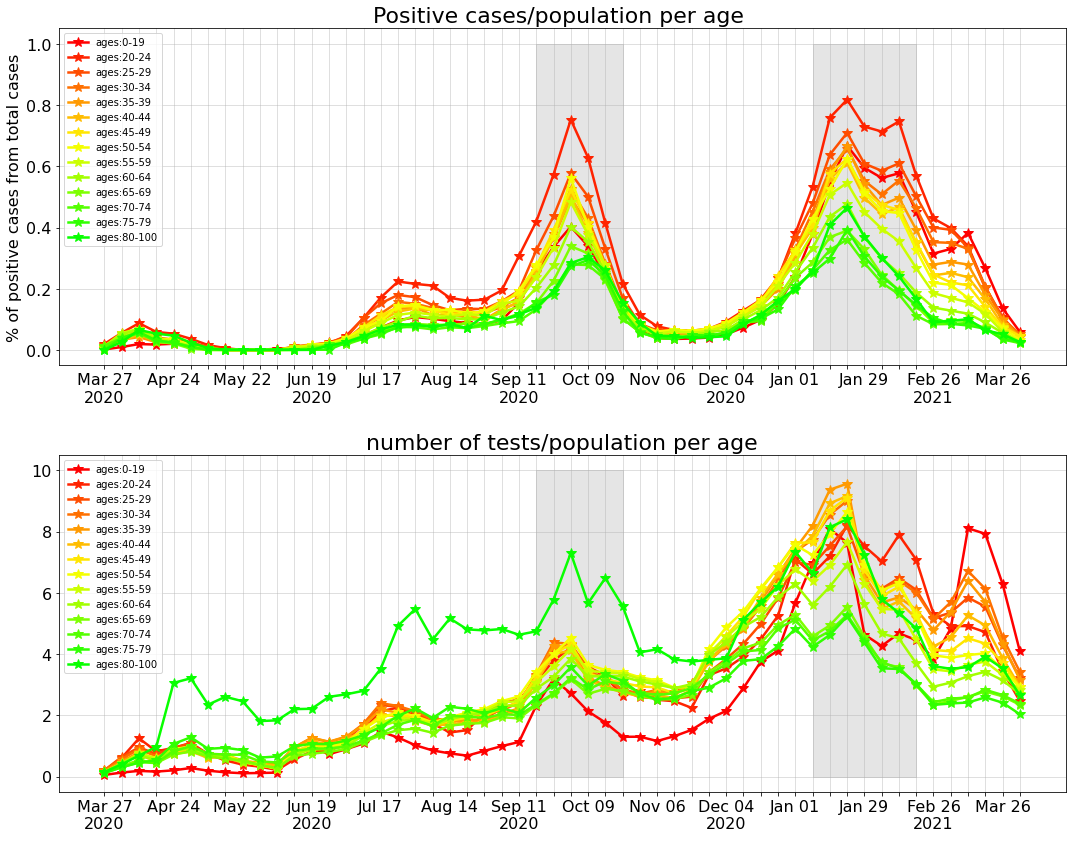

In [44]:
fig, ax = draw_per_population(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1, max_y1=10)
draw_new_x_axis(vaccinations_data, fig, ax)

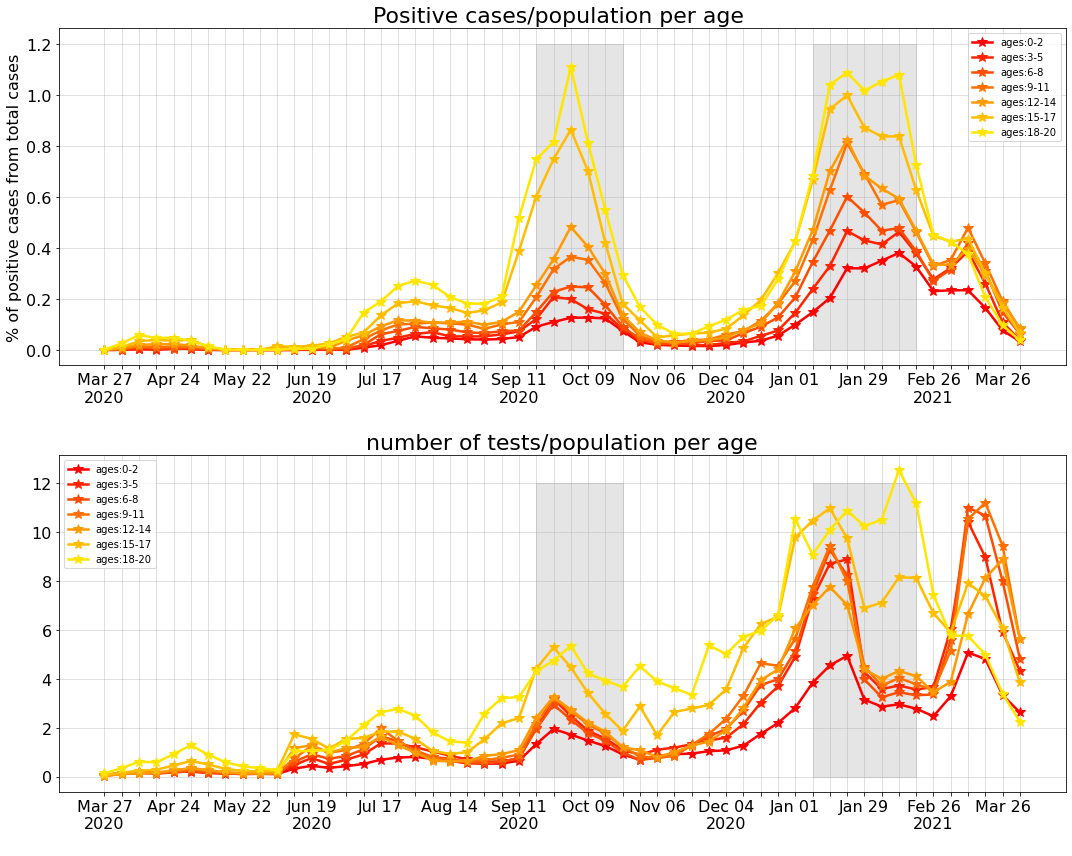

In [45]:
fig, ax = draw_per_population(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=1.2, max_y1=12)
draw_new_x_axis(vaccinations_data, fig, ax)

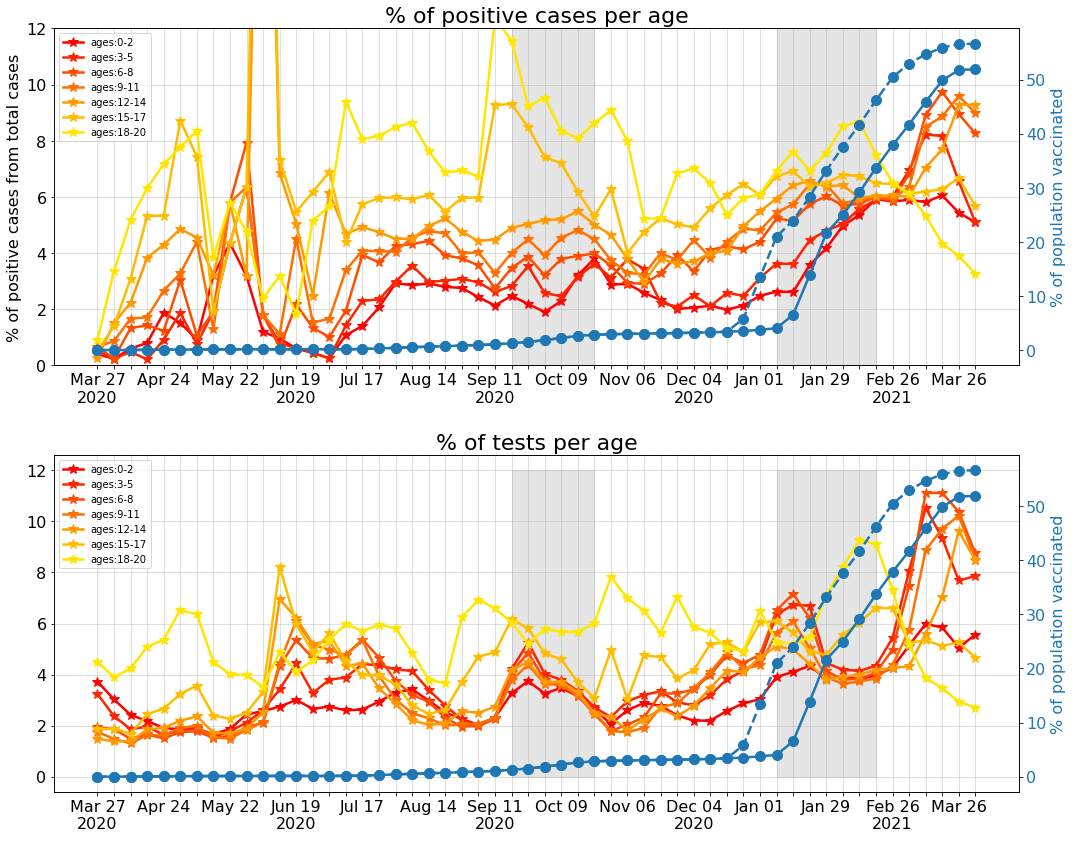

In [46]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_dead=False, with_new=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=45, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)
fig.tight_layout()

## combine all ages into one table

In [47]:
age_gender_test_data_temp = age_gender_test_data[age_gender_test_data.max_age != 19]
all_testing_data = pd.concat([young_test_data, age_gender_test_data_temp]).drop(columns=['gender', 'weekly_deceased', 'weekly_newly_tested'])

In [48]:
young_data_tot = young_test_data[young_test_data.max_age != 20]

In [49]:
young_data_tot = young_data_tot.groupby('weeks_from', as_index=False).agg({'max_age': 'last', 
                                        'percentage_age':'sum',
                                        'total_age_in_population': 'sum',
                                        'min_age':'first',
                                        'weekly_tests_num':'sum',
                                        'weekly_cases':'sum',
                                        'weekly_newly_tested':'sum'})

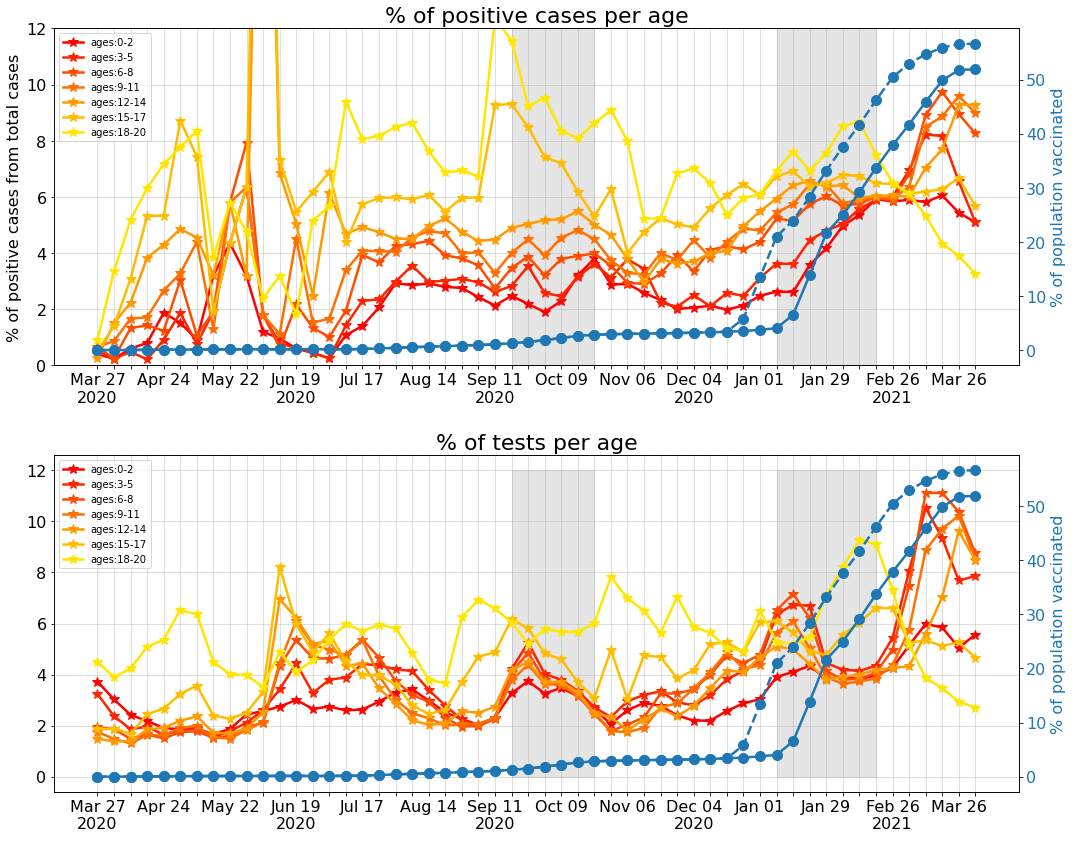

In [50]:
fig, ax = draw_per_total(young_test_data, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].set_ylim([0, 12])
draw_lockdowns(fig, ax, max_y0=12, max_y1=12)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

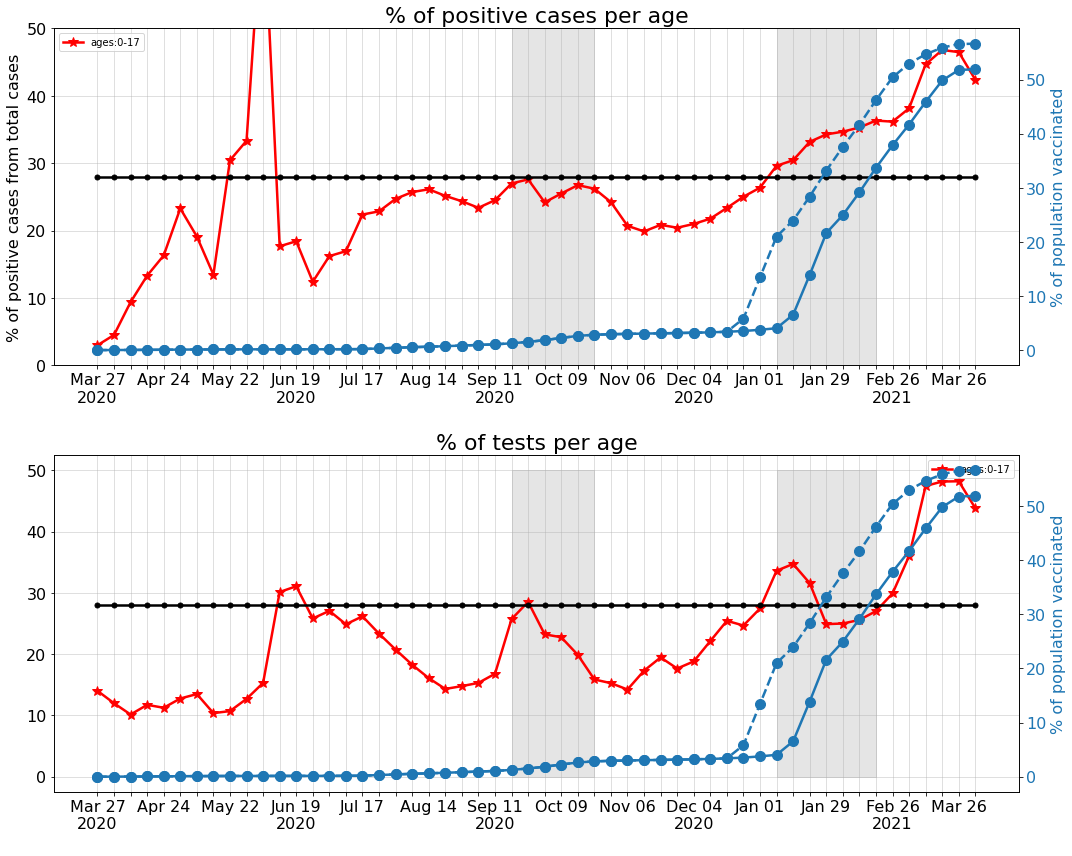

In [51]:
fig, ax = draw_per_total(young_data_tot, test_data_agg_weeks, with_new=False, with_dead=False)
ax[0].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[1].plot(young_data_tot['weeks_from'], np.zeros(shape=young_data_tot['weeks_from'].size) + 28, color='k', marker='.')
ax[0].set_ylim([0, 50])
draw_lockdowns(fig, ax, max_y0=50, max_y1=50)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [52]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(vaccinations_data['weeks_from'], vaccinations_data.weeks_from)
# ax[0].grid()
# positions = vaccinations_data['weeks_from'].to_numpy()

# ax_new = plt.setp(ax[0], xticks=positions, xticklabels=ticklabels)
# # ax[0].set_xticks(positions, labels)A
# # draw_lockdowns(fig, ax, max_y0=800000, max_y1=1)
# # draw_vaccinations_percentage(vaccinations_data, fig, ax)

In [53]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


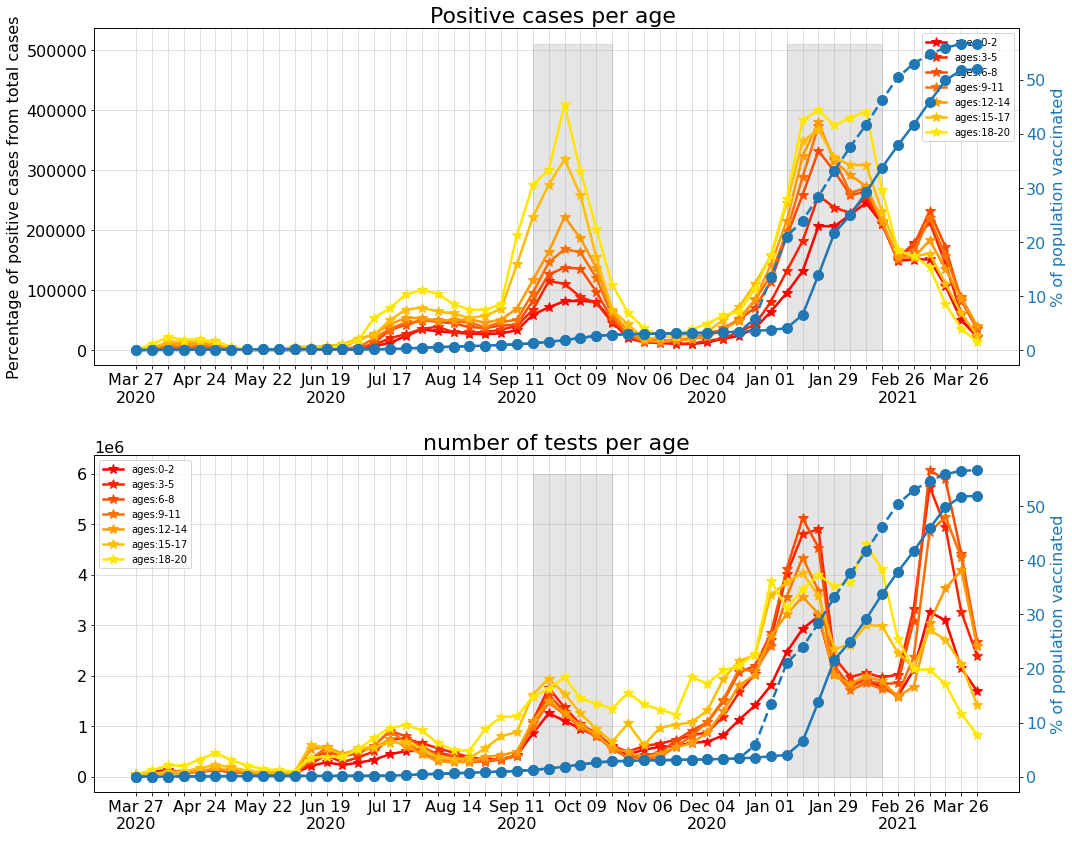

In [54]:
fig, ax = draw_absolute_numbers(young_test_data, with_dead=False)
draw_lockdowns(fig, ax, max_y0=510000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

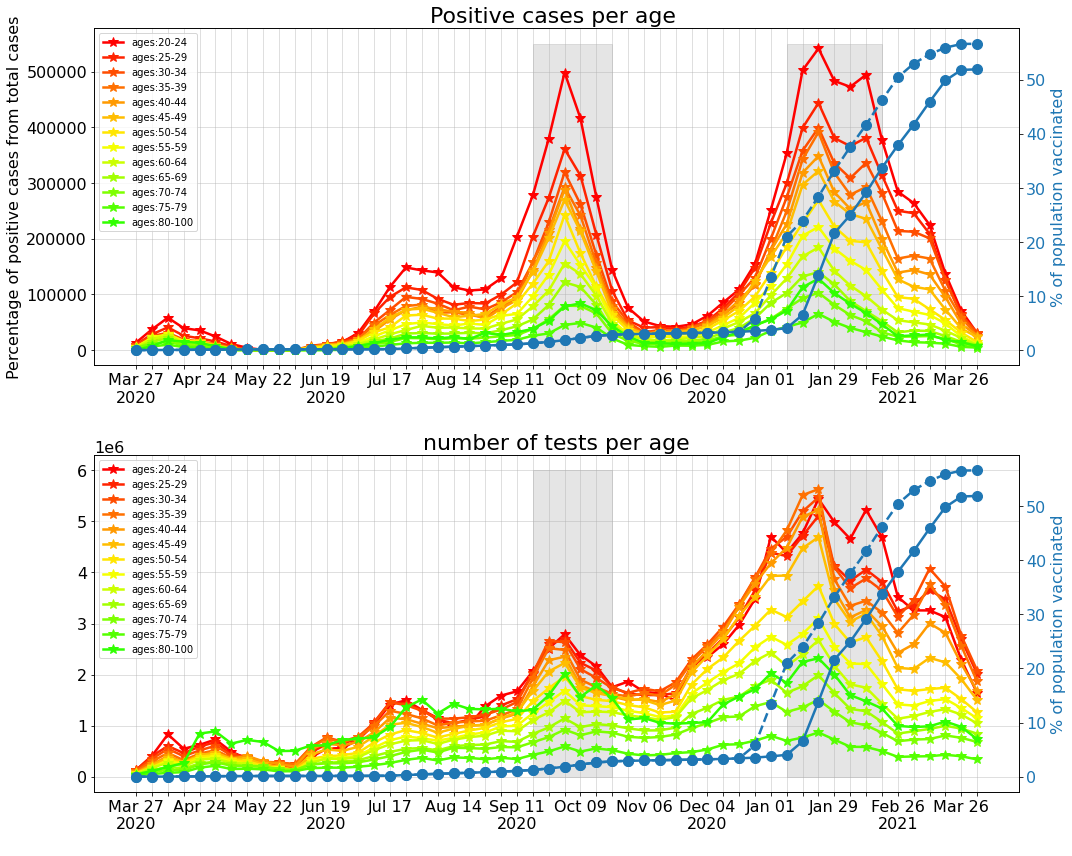

In [55]:
fig, ax = draw_absolute_numbers(age_gender_test_data_temp, with_dead=False)
draw_lockdowns(fig, ax, max_y0=550000, max_y1=6*10**6)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

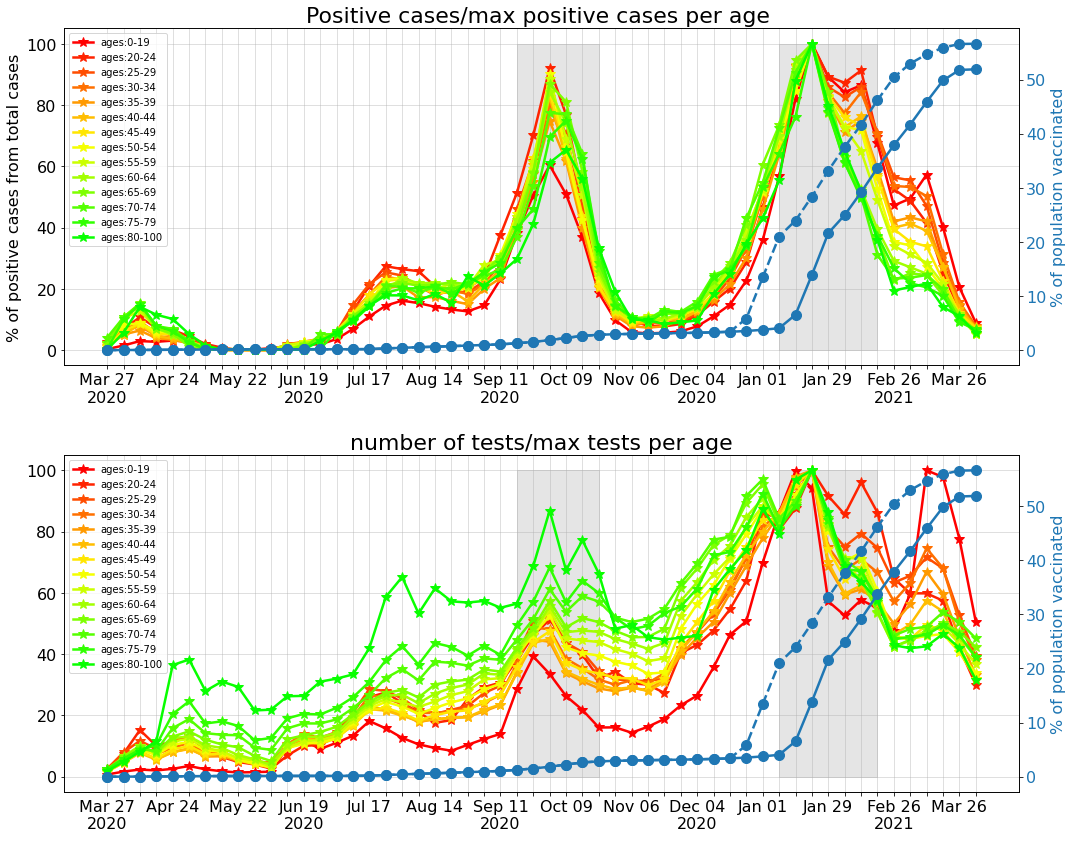

In [56]:
fig, ax = draw_per_max(age_gender_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

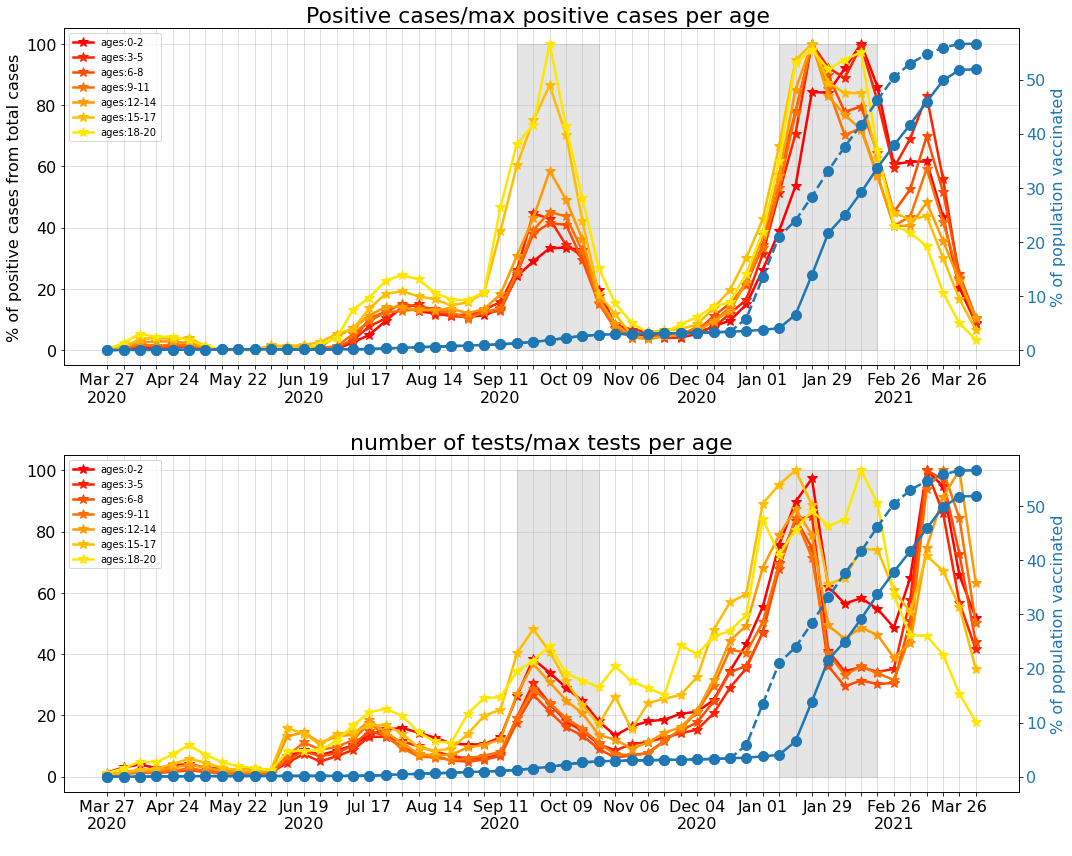

In [57]:
fig, ax = draw_per_max(young_test_data, with_dead=False, with_new=False)
draw_lockdowns(fig, ax, max_y0=100, max_y1=100)
draw_vaccinations_percentage(vaccinations_data, fig, ax)
draw_new_x_axis(vaccinations_data, fig, ax)

In [58]:
agg_data_temp = all_testing_data.groupby(['min_age', 'max_age'], as_index = False).agg({'percentage_age': 'first', 
                                                                         'total_age_in_population': 'first', 
                                                                        'weeks_from': 'last', 
                                                                        'weekly_tests_num': 'sum', 
                                                                        'weekly_cases': 'sum'})
total_cases = np.sum(agg_data_temp.weekly_cases)

In [59]:
agg_data_temp['percentage_positive'] = np.round(100 * agg_data_temp.weekly_cases / total_cases, 3)

In [60]:
# agg_data_temp[['min_age', 'max_age', 'percentage_positive']]

Text(0, 0.5, 'Age group')

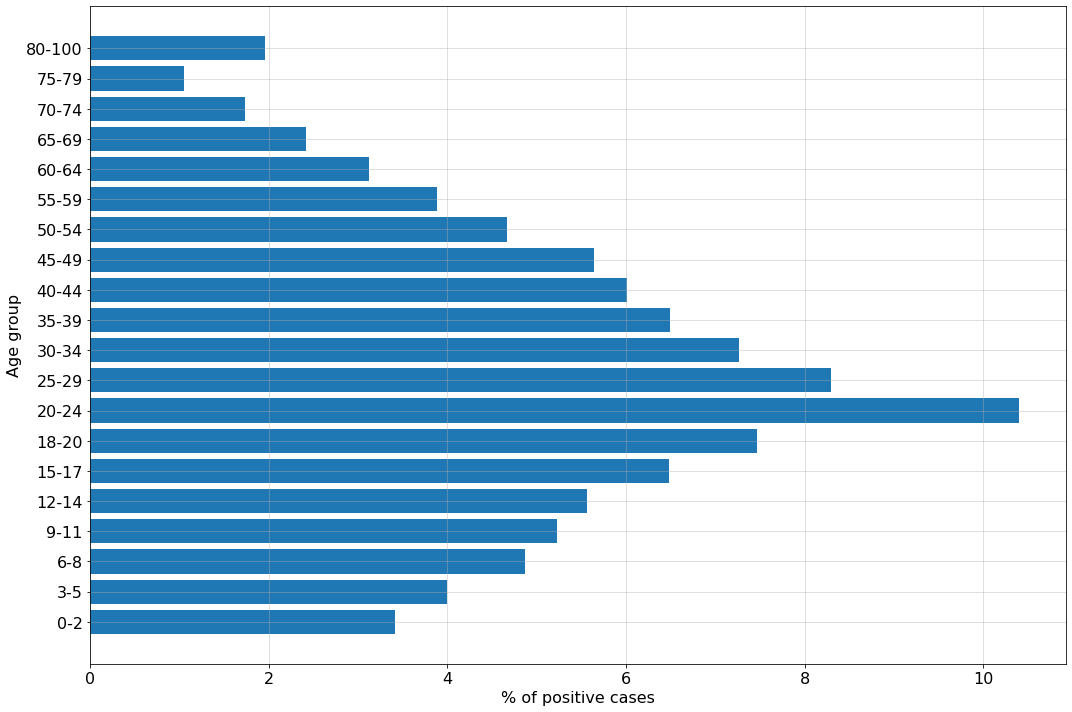

In [61]:
plt.rcParams["figure.figsize"] = (15,10)
height = agg_data_temp.percentage_positive
bars = [f"{int(i)}-{j}" for i,j in zip(agg_data_temp.min_age, agg_data_temp.max_age)]
y_pos = np.arange(len(bars))
plt.grid()
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
plt.xlabel('% of positive cases')
plt.ylabel('Age group')

In [62]:
geo_vacc_second_over_60 = geo_vacc_per_age['second_dose_60-69'] + geo_vacc_per_age['second_dose_70-79'] + geo_vacc_per_age['second_dose_80-89'] + geo_vacc_per_age['second_dose_90+']

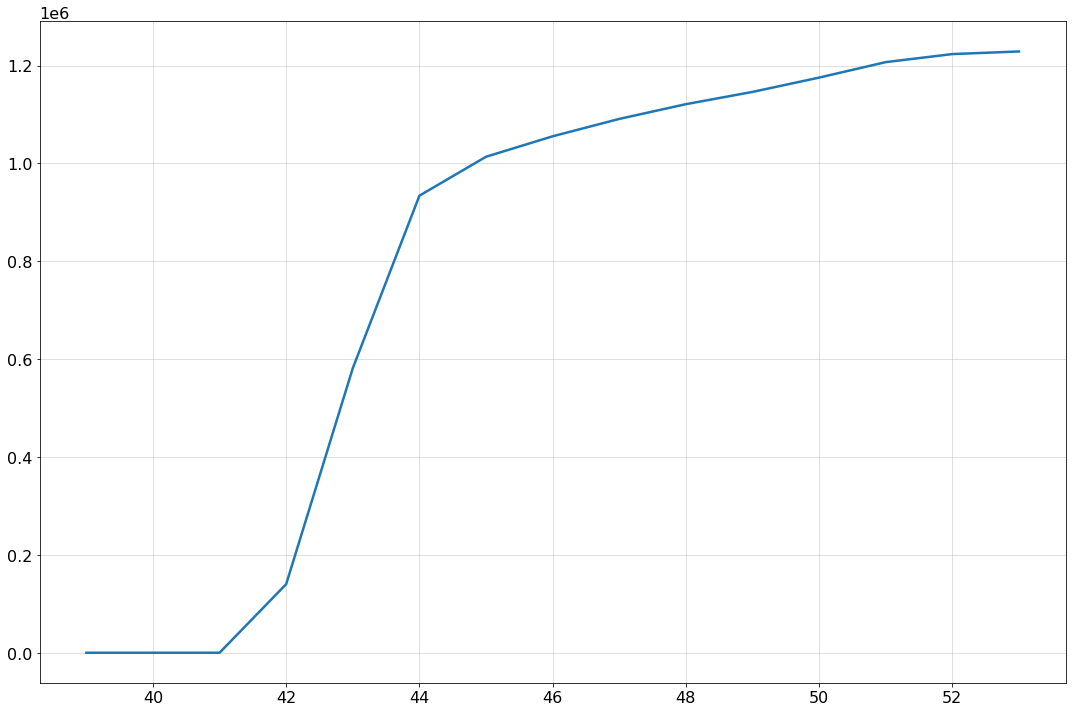

In [63]:
plt.plot(geo_vacc_per_age.weeks_from, geo_vacc_second_over_60)
plt.grid()

In [64]:
geo_vacc_per_age.weeks_from

0     39
1     40
2     41
3     42
4     43
5     44
6     45
7     46
8     47
9     48
10    49
11    50
12    51
13    52
14    53
Name: weeks_from, dtype: int64